<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/05_Visualizing_hierarchical_clustering_of_the_grains_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dendrogram**

A dendrogram is a diagram representing a tree. This diagrammatic representation is frequently used in different contexts: in hierarchical clustering, it illustrates the arrangement of the clusters produced by the corresponding analyses. 

Visualisations communicate insights and hierarchies are clusters that are contained in one another.

**The Seeds Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

All of these parameters were real-valued continuous.

This dataset was sourced from the UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/seeds

In [0]:
# Download the seeds data using wget (Linux)
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt

--2020-01-02 16:56:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt.2’

seeds_dataset.txt.2 100%[===================>]   9.08K  --.-KB/s    in 0s      

2020-01-02 16:56:28 (81.3 MB/s) - ‘seeds_dataset.txt.2’ saved [9300/9300]



Import NumPy and Pandas

In [0]:
import numpy as np
import pandas as pd

Load the dataset to an array 'samples' containing the measurements (such as area, perimeter, length, and several others) of samples of grain.

In [0]:
samples = np.genfromtxt('seeds_dataset.txt')

In [0]:
# Test the dataload for the seeds dataset
samples

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

In [0]:
labels = samples[:,-1]
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3.])

In [0]:
varieties = np.where(labels==1, 'Canadian Wheat', np.where(labels==2, 'Kama Wheat', np.where(labels==3, 'Rosa Wheat', labels)))
varieties

array(['Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat',

In [0]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [0]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

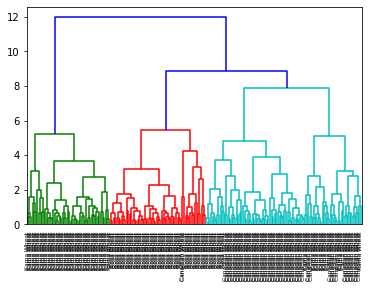

In [0]:
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()